In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

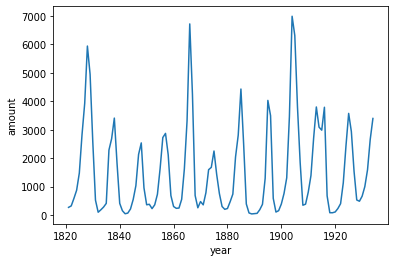

In [7]:
# load Lynx Canadian dataset
ds = pd.read_csv('..\datasets\lynx.csv', usecols=[1,2],engine='python')
ds['time'].astype(int)
ds['value'].astype(int)
plt.plot(ds['time'].values, ds['value'].values)
plt.xlabel('year')
plt.ylabel('amount')
plt.savefig("Fig1Lynx.eps", format="eps", transparent=False)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

In [9]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [19]:
ts_values = ds['value'].values
ts_values = pd.Series(
    ts_values, index=pd.date_range("1-1-1821", periods=len(ts_values), freq="Y"), name="LYNX"
)
ts_values.describe()

count     114.000000
mean     1538.017544
std      1585.843914
min        39.000000
25%       348.250000
50%       771.000000
75%      2566.750000
max      6991.000000
Name: LYNX, dtype: float64

In [26]:
ts_values


1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
              ... 
1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, Name: LYNX, Length: 114, dtype: int64

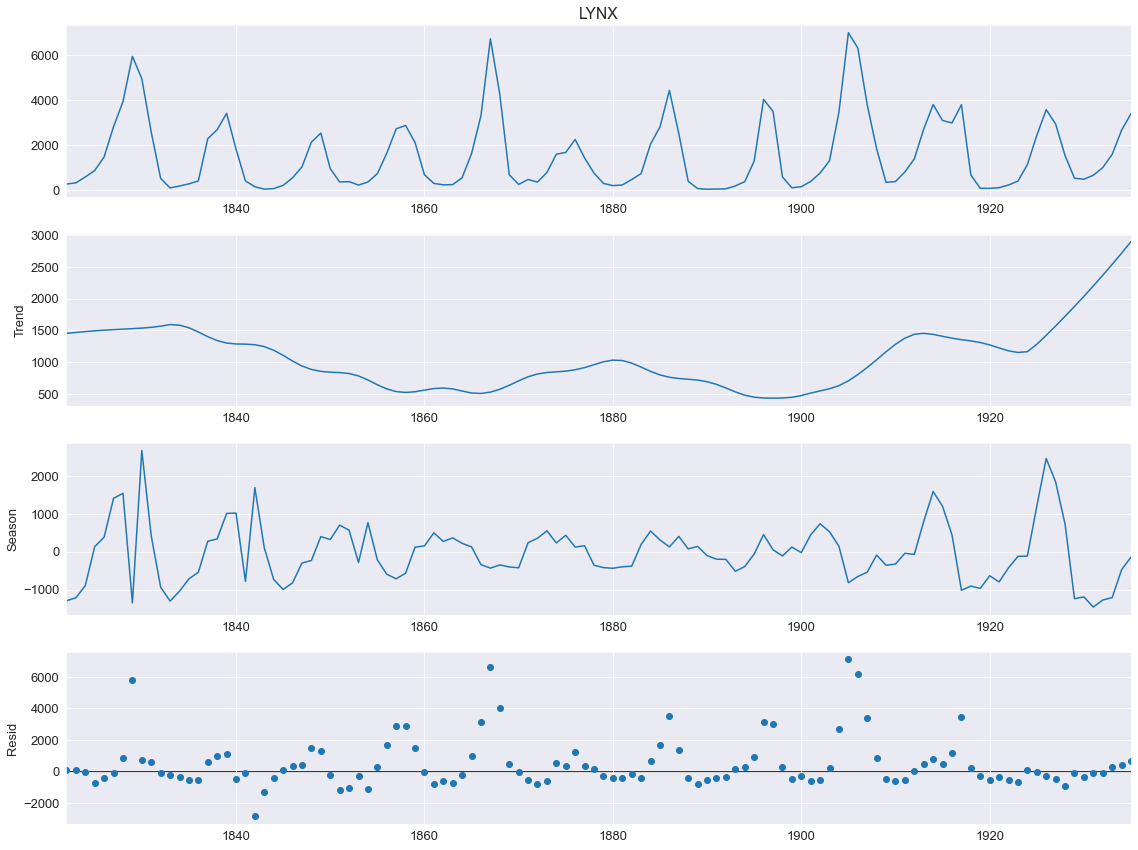

In [32]:
from statsmodels.tsa.seasonal import STL
stl = STL(ts_values, seasonal=7, period=12,robust=True)
res = stl.fit()
fig = res.plot()

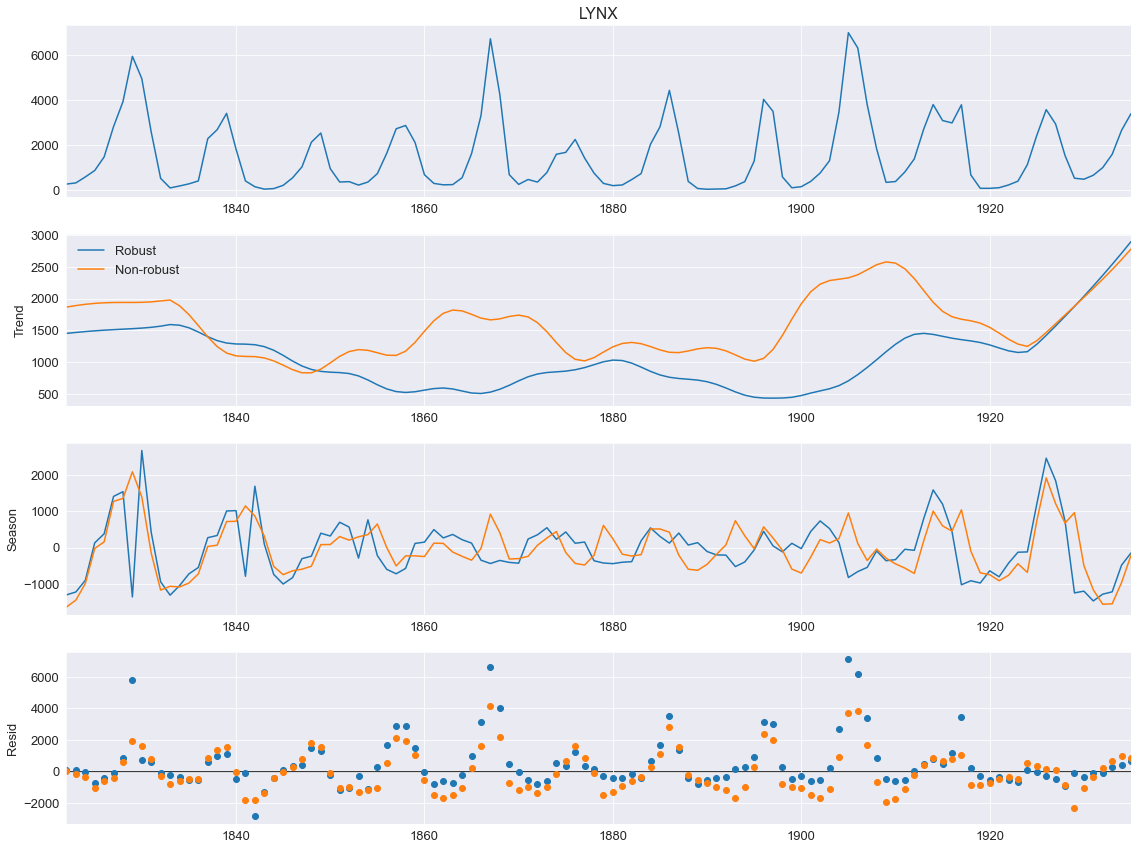

In [34]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(ts_values, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(ts_values, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

In [48]:
res_robust.resid

1821-12-31    111.272900
1822-12-31     69.472093
1823-12-31      0.761564
1824-12-31   -755.866905
1825-12-31   -411.386723
                 ...    
1930-12-31    -72.844825
1931-12-31    -87.540198
1932-12-31    267.671768
1933-12-31    422.818160
1934-12-31    647.867068
Freq: A-DEC, Name: resid, Length: 114, dtype: float64

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

ts_values.index.freq = ts_values.index.inferred_freq
stlf = STLForecast(ts_values, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stl.fit()

forecast = stlf_res.forecast()
plt.plot(ts_values)
plt.plot(forecast)
plt.show()

AttributeError: 'DecomposeResult' object has no attribute 'forecast'

[*********************100%%**********************]  1 of 1 completed


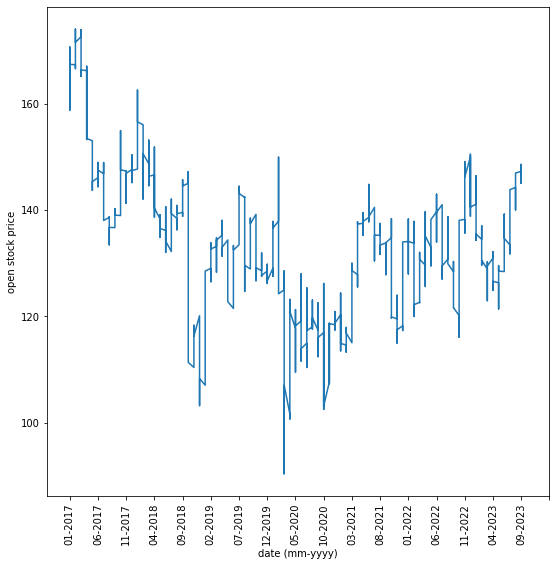

In [16]:
def left(arr):
    x=[] 
    for i in range(len(arr)):
        x.append(arr[i][5:7]+'-'+arr[i][0:4]) 
    return x
def nTicks(data, steps):
    arr=[]
    i = 0
    if(steps>2):
        steps = steps -1
        n = int(len(data) / (steps))                
        while (i  <= len(data)):
            arr.append(data[i])
            i = i + n
        arr[len(arr)-1]=data[len(data)-1]            
    else:
        arr.append(data[0])
        arr.append(data[len(data)-1])
        
    return arr
# load IBM Stock price  dataset
from datetime import datetime
# Define the stock symbol (IBM)
stock_symbol = "IBM"

# Define the start and end dates for the historical data
start_date = "2017-01-01"
end_date = "2023-09-21"

# Download historical data
ds = yf.download(stock_symbol, start=start_date, end=end_date,)

dates = ds.index
nm_dates = dates.strftime('%m-%Y')
ds['Open'].astype(float)
#ds['Date']=left(ds['Date'])
plt.figure(figsize=(9, 9))
plt.plot(nm_dates, ds['Open'].values)
plt.xticks(np.arange(0, 90, step=5), rotation=90)  ## xticks change 
plt.xlabel('date (mm-yyyy)')
plt.ylabel('open stock price')
plt.savefig("Fig2IBM.eps", format="eps", transparent=False )
plt.show()

[*********************100%%**********************]  1 of 1 completed


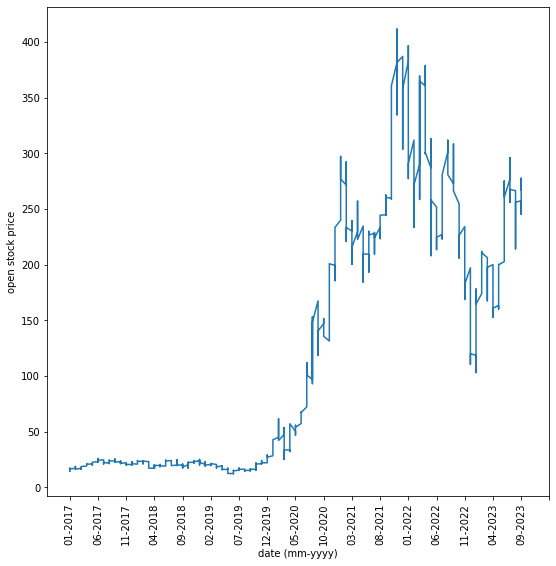

In [20]:
def left(arr):
    x=[] 
    for i in range(len(arr)):
        x.append(arr[i][5:7]+'-'+arr[i][0:4]) 
    return x
def nTicks(data, steps):
    arr=[]
    i = 0
    if(steps>2):
        steps = steps -1
        n = int(len(data) / (steps))                
        while (i  <= len(data)):
            arr.append(data[i])
            i = i + n
        arr[len(arr)-1]=data[len(data)-1]            
    else:
        arr.append(data[0])
        arr.append(data[len(data)-1])
        
    return arr
# load IBM Stock price  dataset
from datetime import datetime
# Define the stock symbol (Tesla)
stock_symbol = "TSLA"

# Define the start and end dates for the historical data
start_date = "2017-01-01"
end_date = "2023-09-21"

# Download historical data
ds = yf.download(stock_symbol, start=start_date, end=end_date,)

dates = ds.index
nm_dates = dates.strftime('%m-%Y')
ds['Open'].astype(float)
#ds['Date']=left(ds['Date'])
plt.figure(figsize=(9, 9))
plt.plot(nm_dates, ds['Open'].values)
plt.xticks(np.arange(0, 90, step=5), rotation=90)  ## xticks change 
plt.xlabel('date (mm-yyyy)')
plt.ylabel('open stock price')
plt.savefig("Fig4TSLA.eps", format="eps", transparent=False )
plt.show()

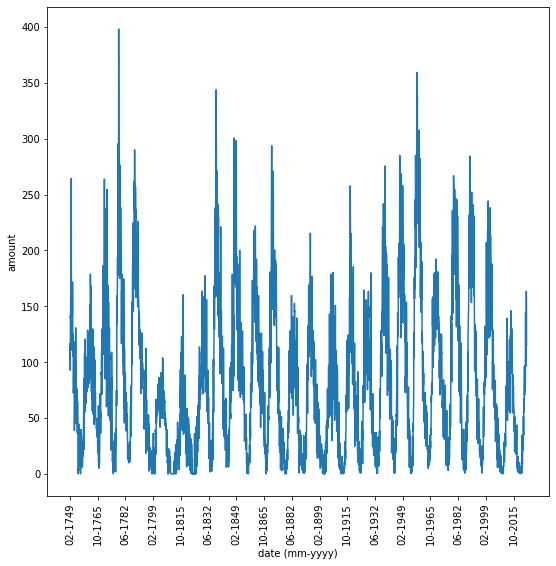

In [19]:
def left(arm, ary):
    x=[] 
    for i in range(len(arm)):
        if(int(arm[i])<10):
            strdate='0'
        else:
            strdate=''    
        x.append(strdate+arm[i]+'-'+ary[i][0:4]) 
    return x
def nTicks(data, steps):
    arr=[]
    i = 0
    if(steps>2):
        steps = steps -1
        n = int(len(data) / (steps))                
        while (i  <= len(data)):
            arr.append(data[i])
            i = i + n
        arr[len(arr)-1]=data[len(data)-1]            
    else:
        arr.append(data[0])
        arr.append(data[len(data)-1])
        
    return arr
# load New Number sunspot  dataset
from datetime import datetime
ds = pd.read_csv('SN_m_tot_V2.0.csv', usecols=[0,1,2,3],engine='python',sep=';')
ds.columns=['Year','Month','Acum','Value']
ds['Year']=ds['Year'].astype(str)
ds['Month']=ds['Month'].astype(str)
ds['Date']=left(ds['Month'], ds['Year'])
ds['Date']

plt.figure(figsize=(9, 9))
plt.plot(ds['Date'].values, ds['Value'].values)
plt.xticks(np.arange(0, 3245, step=200), rotation=90)  ## xticks change 
plt.xlabel('date (mm-yyyy)')
plt.ylabel('amount')
plt.savefig("Fig3Sunspot.eps", format="eps", transparent=False )
plt.show()

In [ ]:
#References

#IBM Stock Prices 
#https://finance.yahoo.com/quote/IBM/history?period1=1483228800&period2=1694304000&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true

#New Number of Sunspots
#https://www.sidc.be/SILSO/datafiles

#Lynx Canadian
#https://vincentarelbundock.github.io/Rdatasets/datasets.html